<a href="https://colab.research.google.com/github/juwimana/Surrey-Crime-and-Collision-Incidents/blob/main/Surrey_Crime_and_Collision_Incidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Surrey](https://https://www.surrey.ca/), British Columbia, Canada Crime and Collision Incidents 2014-19 Analysis**
Today, I will be an analyizing the Crime and Collison Incidents 2014-2019 [Data Set](https://data.surrey.ca/dataset/rcmp-crime/resource/130f817c-0940-4cbe-bac8-90dac92f0670) for Surrey (British Columbia) in search of insights and a better understanding of Python as a tool for Data Science 

# Importing Data
Below, we will use [Python Pandas](https://pandas.pydata.org/docs/index.html) to import our csv formated data from a Github URL and read it into a Pandas Dataframe using the Pandas [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv) function. 

In [36]:
#import data analysis packages
import pandas as pd
import numpy as np

#import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#import the data from Github URL
ccc19 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202019', sep='\t')
ccc18 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202018',sep ='\t')
ccc17 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202017',sep ='\t')
ccc16 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202016',sep='\t')
ccc15 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202015',sep='\t')
ccc14 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202014',sep='\t')
ccc13 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202013',sep='\t')
ccc12 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202012',sep='\t')
ccc11 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202011',sep='\t')
csv_files = [ccc12, ccc13, ccc14, ccc15, ccc16, ccc17, ccc18, ccc19]
ccc = ccc11.append(csv_files)
ccc

,INCIDENT_TYPE,LOCATION,MONTH,YEAR
0,Break and Enter - Business,15500 24TH AVE,1,2011
1,Break and Enter - Business,6300 152ND ST,1,2011
2,Break and Enter - Business,16400 80TH AVE,1,2011
3,Break and Enter - Business,9000 152ND ST,1,2011
4,Break and Enter - Business,14600 64TH AVE,1,2011
...,...,...,...,...
20474,Graffiti,12993 KING GEORGE BLVD,11,2019
20475,Graffiti,16098 FRASER HWY,12,2019
20476,Graffiti,13778 100 AVE,11,2019
20477,Graffiti,9310 KING GEORGE BLVD,12,2019


# Initial Exploration Data Analysis (EDA)
In this section, I will be familiarizing myself with the data set and understand the structure it's currently in along with any insights

In [49]:
#View first few lines of data set
ccc.head()

,INCIDENT_TYPE,LOCATION,MONTH,YEAR
0,Break and Enter - Business,15500 24TH AVE,1,2011
1,Break and Enter - Business,6300 152ND ST,1,2011
2,Break and Enter - Business,16400 80TH AVE,1,2011
3,Break and Enter - Business,9000 152ND ST,1,2011
4,Break and Enter - Business,14600 64TH AVE,1,2011


In [50]:
#use shape to check the size of our data (rows, columns)
ccc.shape 

(201503, 4)

In [51]:
#finding percent missing values
ccc.isna().mean()

INCIDENT_TYPE    0.000000
LOCATION         0.000114
MONTH            0.000000
YEAR             0.000000
dtype: float64

In [52]:
#finding the count of missing values for each column
ccc.isnull().sum()

INCIDENT_TYPE     0
LOCATION         23
MONTH             0
YEAR              0
dtype: int64

Based on the above, we do not have any missing values to fill in, except for LOCATION which is missing **28** values. However, since my analysis will not focus on location, at the moment, no filling is required. 

Will delete LOCATION from file

Let's do some deeper Exploration Data Analysis (EDA)

In [53]:
ccc.head()

,INCIDENT_TYPE,LOCATION,MONTH,YEAR
0,Break and Enter - Business,15500 24TH AVE,1,2011
1,Break and Enter - Business,6300 152ND ST,1,2011
2,Break and Enter - Business,16400 80TH AVE,1,2011
3,Break and Enter - Business,9000 152ND ST,1,2011
4,Break and Enter - Business,14600 64TH AVE,1,2011


In [54]:
#deleting column HUNDRED_BLOCK
del ccc['LOCATION']

In [55]:
#checking for successful deletion of column
ccc.head()

,INCIDENT_TYPE,MONTH,YEAR
0,Break and Enter - Business,1,2011
1,Break and Enter - Business,1,2011
2,Break and Enter - Business,1,2011
3,Break and Enter - Business,1,2011
4,Break and Enter - Business,1,2011


# Deeper EDA
In this section, we will use visualizations to help understand our data set

In [56]:
ccc.head()

,INCIDENT_TYPE,MONTH,YEAR
0,Break and Enter - Business,1,2011
1,Break and Enter - Business,1,2011
2,Break and Enter - Business,1,2011
3,Break and Enter - Business,1,2011
4,Break and Enter - Business,1,2011


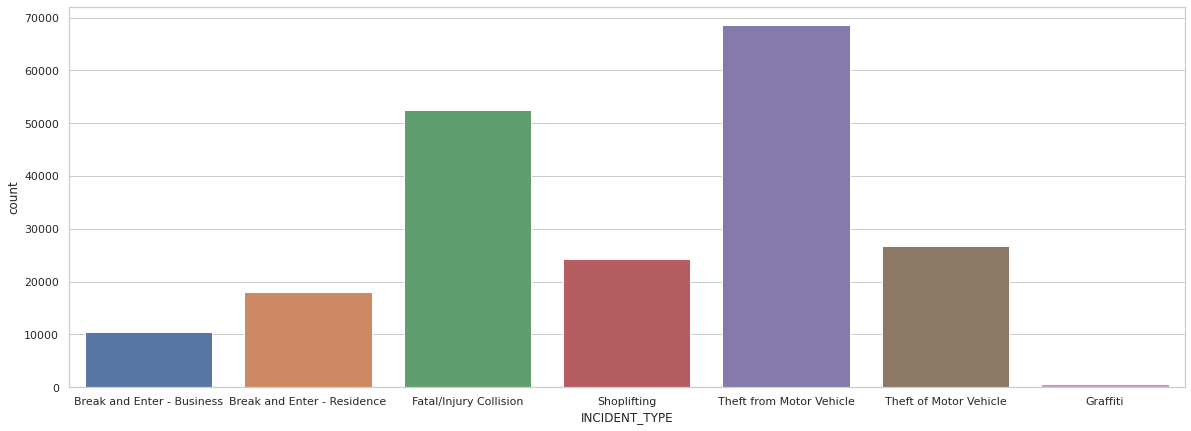

In [57]:
#Which incident type occured most in the past eight years (2011-19) in Surrey
plt.rcParams["figure.figsize"] = (20,7)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="INCIDENT_TYPE", data=ccc)

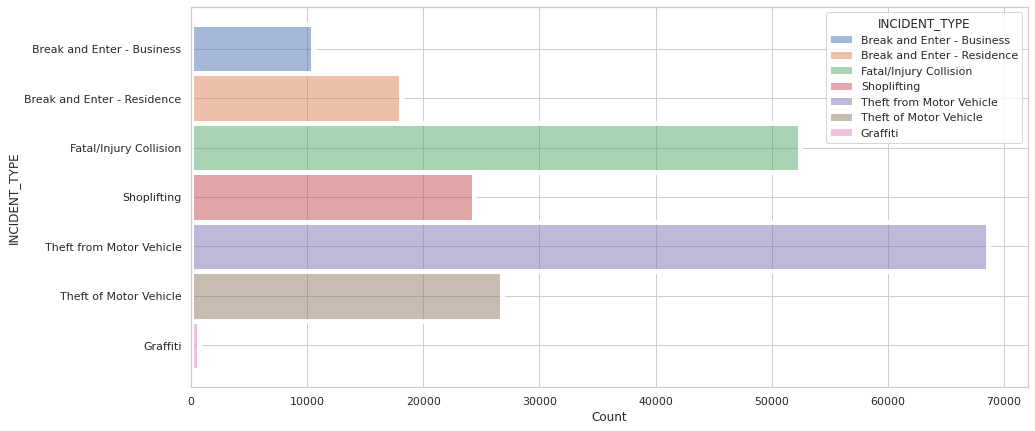

In [58]:
#How does each incident type in Surrey distributed over the eight years (2017-19)
plt.rcParams["figure.figsize"] = (15,7)
sns.histplot(data=ccc['INCIDENT_TYPE'], y=ccc['INCIDENT_TYPE'], hue=ccc['INCIDENT_TYPE'])

For the past eight years (2011-19):
*   Theft from Motor Vehicle was the most frequent incident type
*   Fatal/Injury collision second most incident type
*   Gaffiti was the least incident type 

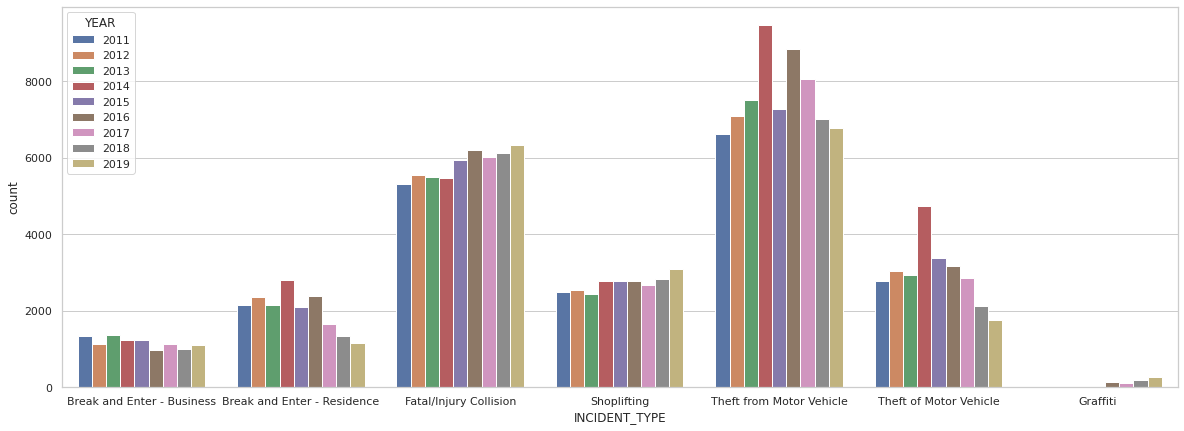

In [59]:
#Frequency of each incident by year using a countplot
plt.rcParams["figure.figsize"] = (20,7)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="INCIDENT_TYPE", hue='YEAR', data=ccc)

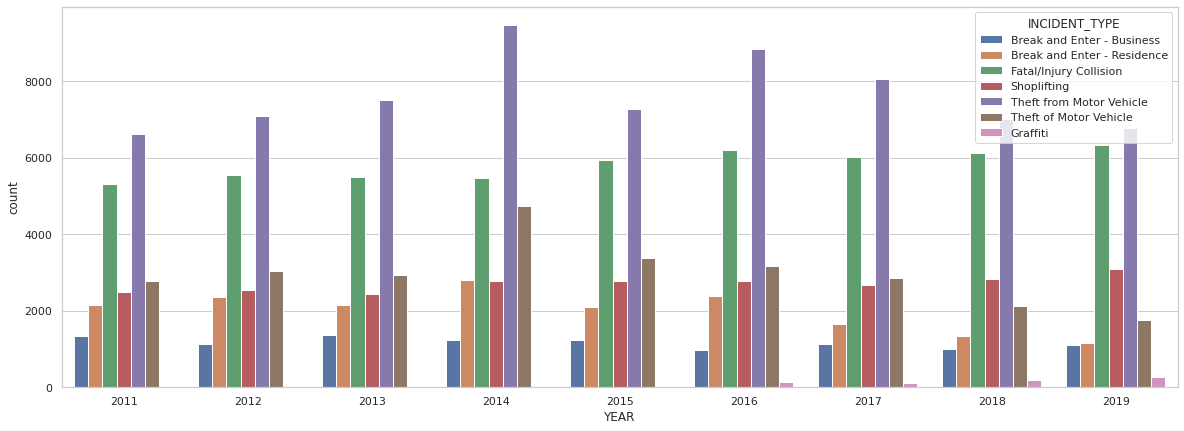

In [61]:
#Frequency of each incident type by year using a countplot
plt.rcParams["figure.figsize"] = (20,7)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="YEAR", hue='INCIDENT_TYPE', data=ccc)

The count plots show, in Surrey:
*   gradual increase in Fatal/Injury Collisons
*   slight rise in Graffiti from 2016-19
*   significant decrease in Theft of Motor Vehicle from 2014-19
*   significant decrese in Theft from Motor Vehicle from 2014-19
*   gradual decrease in Break and Entering of Residence property from 2014-19
*   slight increase in shoplifting
*   high rates of Theft from Motor Vehicle and Fatal/Injury Collision 

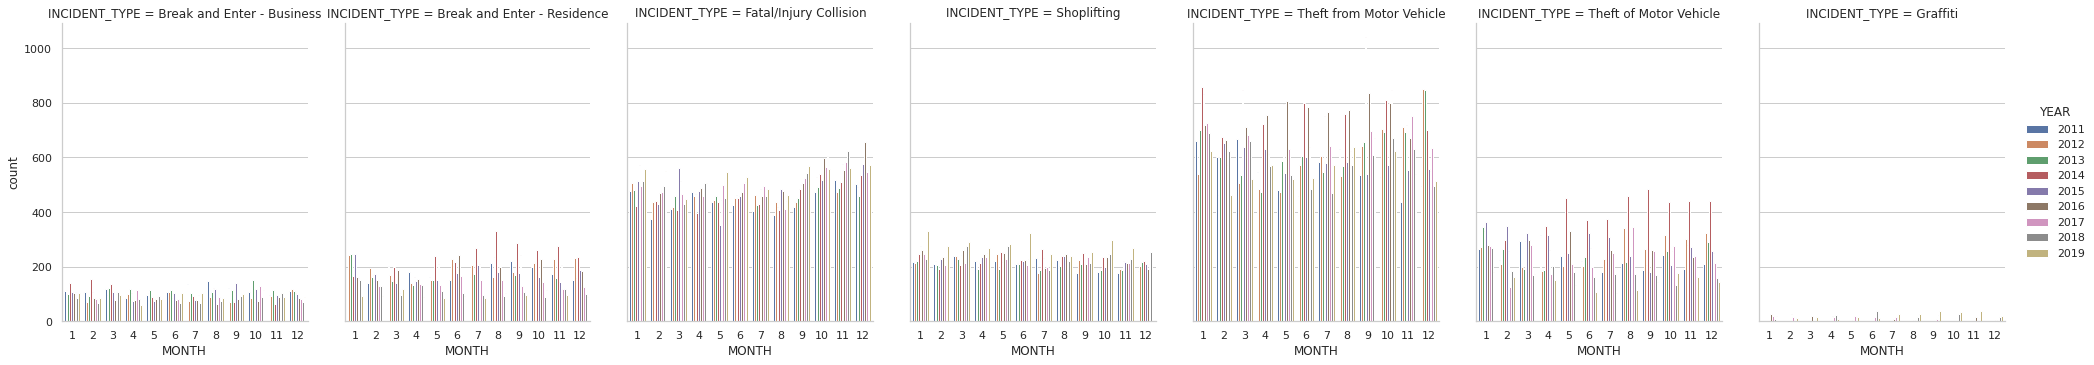

In [99]:
#Frequency of incident type in Surrey monthly in each year
#plt.rcParams["figure.figsize"] = (20,50)
g = sns.catplot(x="MONTH", hue="YEAR", col="INCIDENT_TYPE",
                data=ccc, kind="count", height=5, aspect=0.8);